# Heat Diffusion Problem

The temperature distribution across a wall 1 m thick at a certain instant of time is given as

$$T(x)=a + bx + cx^2 + dx^3$$

where $T$ is in degrees Celsius and $x$ is in meters, while $a$=900<sup>o</sup>C,
$b$=300<sup>o</sup>C/m, and $c$=50<sup>o</sup>C/m<sup>2</sup>. A uniform heat generation,
$\dot{E}_g$=1000 W/m<sup>3</sup>, is present in the wall of area 10m<sup>2</sup> having the
properties $\rho$ = 1600 kg/m<sup>3</sup>, $k$=40 W/mK, and $c_p$=4 kJ/kgK.

1. Determine the rate of heat transfer entering the wall ($x$=0) and leaving the wall ($x$=1m).

In [1]:
# Known
a = 900 # coefficient 0 for temperature function, degC
b = 300 # coefficient 1 for temperature function, degC/m
c = 50 # coefficient 2 for temperature function, degC/m2
d = 2 # coefficient 3 for temperature funciton, degC/m3
heat_generation_per_volume = 1000 # W/m3
area_wall = 10 # m2
x_in = 0 # position of boundary at entrance
x_out = 1 # position of boundary at exit, m

In [2]:
# Find
heat_transfer_in = None # W
heat_transfer_out = None # W

# Schematics
![Schematic](images/HeatDiffusionEquationExample.png)

# Assumption
1. Constant and homogeneous properties
2. Uniform heat generation
3. Temperature profile is given

In [3]:
# Properties
density_wall = 1600 # kg/m3
thermal_conductivity_wall = 40 # W/mK
c_p = 4 # 4 kJ/kgK

# Analysis
Let's create a function of the temperature profile and the temperature gradient and plot it along $x$.

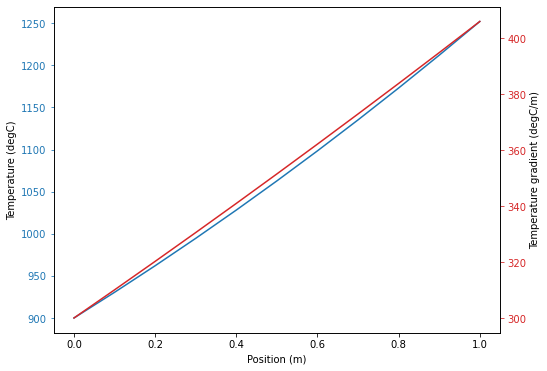

In [4]:
from typing import Union
import numpy as np
import matplotlib.pyplot as plt

def get_temperature(x: Union[float, np.ndarray]) -> Union[float, np.ndarray]:
    return a + b*x + c*x**2 + d*x**3

def get_temperature_gradient(x: Union[float, np.ndarray]) -> Union[float, np.ndarray]:
    return b + 2*c*x + 3*d*x**2

x_vector = np.arange(0, 1.01, 0.1)
temperature_vector = get_temperature(x_vector)
temperature_grad_vector = get_temperature_gradient(x_vector)

fig, ax = plt.subplots(figsize=(8,6))
color = 'tab:blue'
ax.plot(x_vector, temperature_vector, color=color)
ax.set_xlabel('Position (m)')
ax.set_ylabel('Temperature (degC)')
ax.tick_params(axis='y', colors=color)
ax_right = ax.twinx()
color = 'tab:red'
ax_right.plot(x_vector, temperature_grad_vector, color=color)
ax_right.set_ylabel('Temperature gradient (degC/m)')
ax_right.tick_params(axis='y', colors=color)

We can calculate the heat transfer rate from
$$q = k A_\mathrm{wall} \frac{dT}{dx}$$

In [5]:
heat_transfer_in = thermal_conductivity_wall * area_wall * get_temperature_gradient(0)
heat_transfer_out = thermal_conductivity_wall * area_wall * get_temperature_gradient(1)
print(f"Heat transfer rate entering the wall is {heat_transfer_in:.3f} W "
      f", and {heat_transfer_out:.3f} W is leaving")

Heat transfer rate entering the wall is 120000.000 W , and 162400.000 W is leaving


2. Determine the rate of change of energy storage in the wall.

### Known - the same as above

In [6]:
# Find
rate_energy_storage_wall = None


### Schematic, Assumption, Properties - the same as above

### Analysis
From the convervaion of energy:
$$\dot{E}_\mathrm{st} = \dot{E}_\mathrm{in} - \dot{E}_\mathrm{out} + \dot{E}_\mathrm{g}$$
$$\dot{E}_\mathrm{st} = q_\mathrm{in} - q_\mathrm{out} + \dot{E}_\mathrm{g}$$

In [7]:
volume = area_wall * (x_out - x_in)
rate_energy_storage_wall = heat_transfer_in - heat_transfer_out + heat_generation_per_volume * \
                           volume
print(f"Rate of energy storage is {rate_energy_storage_wall} W.")

Rate of energy storage is -32400 W.


3. Time rate of temperature change at $x$=0, 0.25, and 0.5 m.

### Known, Schematic, Assumption, Properties - the same as above
### Find
$\dot{T}_{x=0}$, $\dot{T}_{x=0.25}$, $\dot{T}_{x=0.5}$

### Analysis

From the 1D heat diffusion equation with constant $k$,
$$\frac{\partial^2 T}{\partial x}+\frac{\dot{q}}{k} = \frac{1}{\alpha}\frac{\partial T}{\partial t}$$
$$\frac{\partial T}{\partial t} = \alpha \left(\frac{\partial^2 T}{\partial x}+\frac{\dot{q}}{k}\right) $$

In [8]:
# First we will calculate the heat diffusivity
heat_diffusivity = thermal_conductivity_wall / (density_wall * c_p)

# Setting the hessian function for temperature with regard to x
def get_hessian_temperature(x: Union[float, np.ndarray]) -> Union[float, np.ndarray]:
    return 2*c + 6*d*x

# Let's get the function for the dT/dt
def get_rate_change_temperature(x: Union[float, np.ndarray]) -> Union[float, np.ndarray]:
    return heat_diffusivity * (get_hessian_temperature(x) + heat_generation_per_volume / thermal_conductivity_wall)

x_vector = np.array([0, 0.25, 0.5])
rate_change_temperature_vector = get_rate_change_temperature(x_vector)

print(f"The rate of change in temperature at 0, 0.25, 0.5m are {rate_change_temperature_vector} degC/t, respectively.")



The rate of change in temperature at 0, 0.25, 0.5m are [0.78125 0.8     0.81875] degC/t, respectively.
